In [4]:
! pip install chembl_webresource_client
!pip install rdkit

In [5]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [6]:
target = new_client.target
target_query = target.search('prostate cancer')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,19.0,False,CHEMBL3112376,"[{'accession': 'Q96Q83', 'component_descriptio...",SINGLE PROTEIN,9606.0
1,[],Homo sapiens,L-type amino acid transporter 3,18.0,False,CHEMBL4148,"[{'accession': 'O75387', 'component_descriptio...",SINGLE PROTEIN,9606.0
2,[],Rattus norvegicus,Prostate,18.0,False,CHEMBL613656,[],TISSUE,10116.0
3,[],Homo sapiens,Prostate specific antigen,16.0,False,CHEMBL2099,"[{'accession': 'P07288', 'component_descriptio...",SINGLE PROTEIN,9606.0
4,[],Homo sapiens,Prostate stem cell antigen,16.0,False,CHEMBL3712961,"[{'accession': 'O43653', 'component_descriptio...",SINGLE PROTEIN,9606.0
...,...,...,...,...,...,...,...,...,...
114,[],Homo sapiens,Interleukin 13 receptor,4.0,False,CHEMBL3831285,"[{'accession': 'P24394', 'component_descriptio...",PROTEIN COMPLEX,9606.0
115,[],Homo sapiens,Aurora kinase A/Targeting protein for Xklp2,3.0,False,CHEMBL3883304,"[{'accession': 'O14965', 'component_descriptio...",PROTEIN COMPLEX,9606.0
116,[],Homo sapiens,Speckle-type POZ protein/PTEN,3.0,False,CHEMBL4523606,"[{'accession': 'P60484', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606.0
117,[],Homo sapiens,Mitochondrial complex I (NADH dehydrogenase),0.0,False,CHEMBL2363065,"[{'accession': 'P03923', 'component_descriptio...",PROTEIN COMPLEX,9606.0


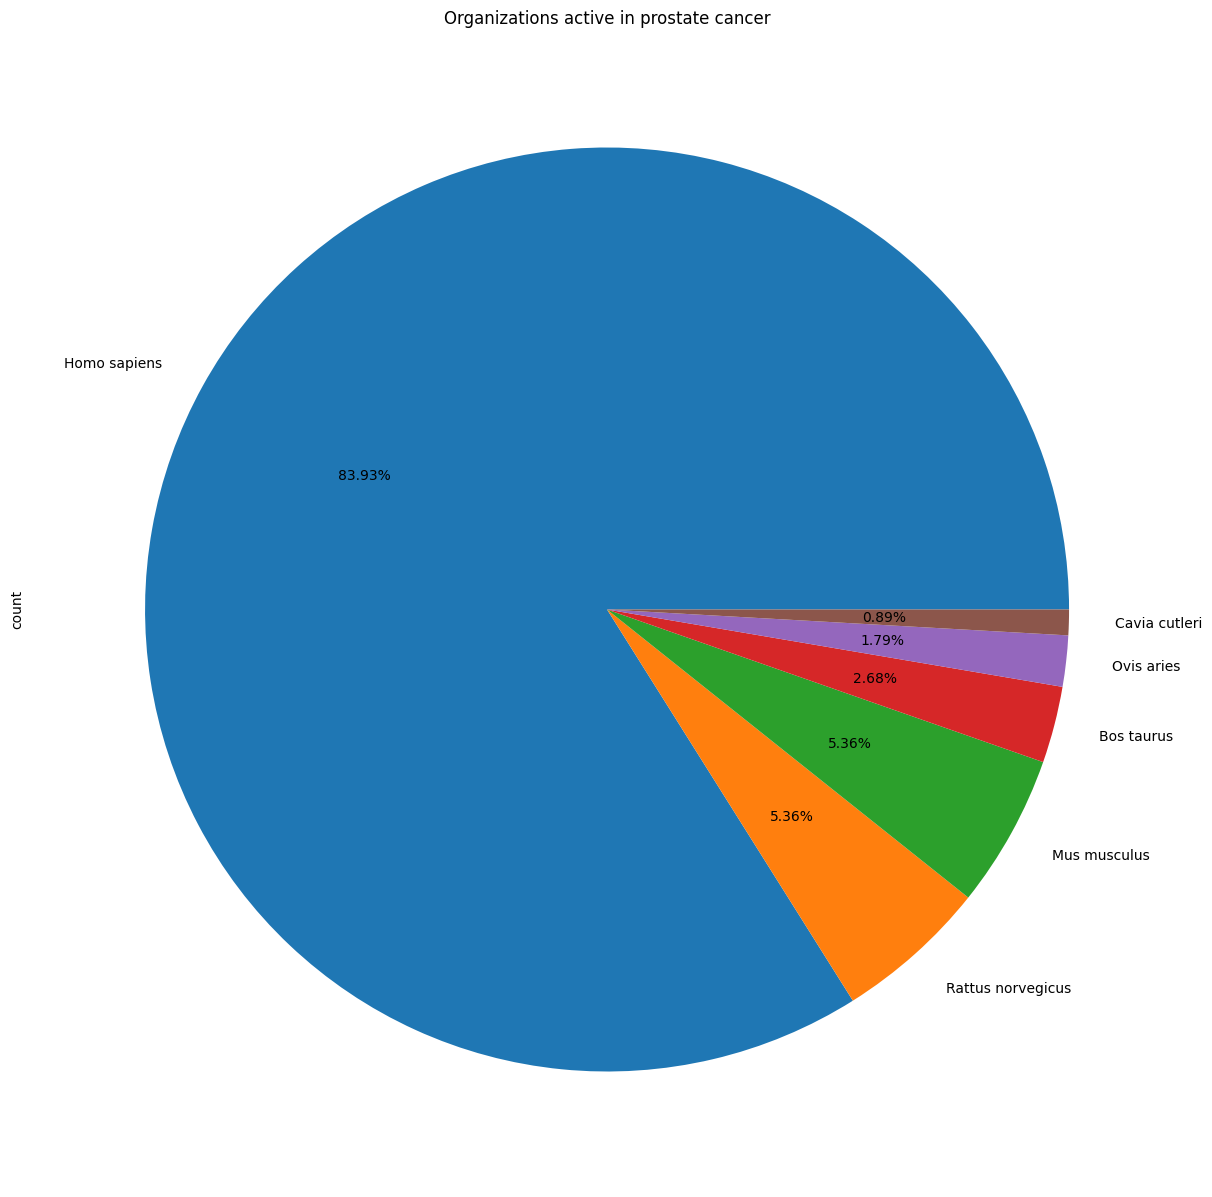

In [7]:
plt.figure(figsize=[15,15])
plt.title("Organizations active in prostate cancer")
targets['organism'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.savefig("Organizations active in prostate cancer.pdf")

In [8]:
selected_target = targets.target_chembl_id[0]
selected_target
activity = new_client.activity
result = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(result)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,13902127,[],CHEMBL3119218,Inhibition of demethylase activity of PCA-1 (u...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,10.0
1,None,None,13902128,[],CHEMBL3119218,Inhibition of demethylase activity of PCA-1 (u...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,10.0
2,None,None,13902129,[],CHEMBL3119218,Inhibition of demethylase activity of PCA-1 (u...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,10.0
3,None,None,13902130,[],CHEMBL3119218,Inhibition of demethylase activity of PCA-1 (u...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,10.0
4,None,None,13902131,[],CHEMBL3119218,Inhibition of demethylase activity of PCA-1 (u...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24989127,[],CHEMBL5229151,Inhibition of human ALKBH3 expressed in Escher...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,22.5
89,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24989128,[],CHEMBL5229151,Inhibition of human ALKBH3 expressed in Escher...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,6.2
90,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24989168,[],CHEMBL5229158,Inhibition of human ALKBH3 by HPLC analysis,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,5.3
91,None,None,24989170,[],CHEMBL5229160,Inhibition of human ALKBH3 demethylase activit...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,100.0


In [9]:
df.to_csv('strongest_drug_bioactivity.csv', index=False)

In [10]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,13902127,[],CHEMBL3119218,Inhibition of demethylase activity of PCA-1 (u...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,10.0
1,None,None,13902128,[],CHEMBL3119218,Inhibition of demethylase activity of PCA-1 (u...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,10.0
2,None,None,13902129,[],CHEMBL3119218,Inhibition of demethylase activity of PCA-1 (u...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,10.0
3,None,None,13902130,[],CHEMBL3119218,Inhibition of demethylase activity of PCA-1 (u...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,10.0
4,None,None,13902131,[],CHEMBL3119218,Inhibition of demethylase activity of PCA-1 (u...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24989127,[],CHEMBL5229151,Inhibition of human ALKBH3 expressed in Escher...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,22.5
89,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24989128,[],CHEMBL5229151,Inhibition of human ALKBH3 expressed in Escher...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,6.2
90,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24989168,[],CHEMBL5229158,Inhibition of human ALKBH3 by HPLC analysis,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,5.3
91,None,None,24989170,[],CHEMBL5229160,Inhibition of human ALKBH3 demethylase activit...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,100.0


In [11]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,13902127,[],CHEMBL3119218,Inhibition of demethylase activity of PCA-1 (u...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,10.0
1,None,None,13902128,[],CHEMBL3119218,Inhibition of demethylase activity of PCA-1 (u...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,10.0
2,None,None,13902129,[],CHEMBL3119218,Inhibition of demethylase activity of PCA-1 (u...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,10.0
3,None,None,13902130,[],CHEMBL3119218,Inhibition of demethylase activity of PCA-1 (u...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,10.0
4,None,None,13902131,[],CHEMBL3119218,Inhibition of demethylase activity of PCA-1 (u...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24989126,[],CHEMBL5229151,Inhibition of human ALKBH3 expressed in Escher...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,21.2
88,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24989127,[],CHEMBL5229151,Inhibition of human ALKBH3 expressed in Escher...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,22.5
90,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24989168,[],CHEMBL5229158,Inhibition of human ALKBH3 by HPLC analysis,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,5.3
91,None,None,24989170,[],CHEMBL5229160,Inhibition of human ALKBH3 demethylase activit...,B,None,None,BAO_0000190,...,Homo sapiens,Alpha-ketoglutarate-dependent dioxygenase alkB...,9606,None,None,IC50,uM,UO_0000065,None,100.0


In [12]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL3145420,Cc1ccc2[nH]c(-n3[nH]c(C)c(Cc4ccccc4)c3=O)nc2c1C,10000.0
1,CHEMBL3145438,Cc1[nH]n(-c2nc3ccccc3[nH]2)c(=O)c1Cc1ccc(Cl)cc1Cl,10000.0
2,CHEMBL3145437,Cc1[nH]n(-c2nc3ccccc3[nH]2)c(=O)c1Cc1ccc(Cl)cc1,10000.0
3,CHEMBL3145418,Cc1[nH]n(-c2nc3ccccc3[nH]2)c(=O)c1Cc1ccccc1Cl,10000.0
4,CHEMBL3145434,O=c1c(Cc2ccccc2)c(-c2ccccc2)[nH]n1-c1nc2ccccc2...,10000.0
...,...,...,...
87,CHEMBL5283651,Cc1cc(C)c(S(=O)(=O)NC(=O)c2cc(C(=O)O)ccn2)c(C)c1,21200.0
88,CHEMBL5288308,O=C(O)c1ccnc(C(=O)NS(=O)(=O)c2ccccc2C(F)(F)F)c1,22500.0
90,CHEMBL418068,O=C(O)c1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O,5300.0
91,CHEMBL509,Cc1ccc(Cl)c(Nc2ccccc2C(=O)O)c1Cl,100000.0


In [13]:
bioactivity_threshold = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [14]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
dataframe = pd.concat([df3, bioactivity_class], axis=1)
dataframe

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL3145420,Cc1ccc2[nH]c(-n3[nH]c(C)c(Cc4ccccc4)c3=O)nc2c1C,10000.0,inactive
1,CHEMBL3145438,Cc1[nH]n(-c2nc3ccccc3[nH]2)c(=O)c1Cc1ccc(Cl)cc1Cl,10000.0,inactive
2,CHEMBL3145437,Cc1[nH]n(-c2nc3ccccc3[nH]2)c(=O)c1Cc1ccc(Cl)cc1,10000.0,inactive
3,CHEMBL3145418,Cc1[nH]n(-c2nc3ccccc3[nH]2)c(=O)c1Cc1ccccc1Cl,10000.0,inactive
4,CHEMBL3145434,O=c1c(Cc2ccccc2)c(-c2ccccc2)[nH]n1-c1nc2ccccc2...,10000.0,inactive
...,...,...,...,...
88,CHEMBL5288308,O=C(O)c1ccnc(C(=O)NS(=O)(=O)c2ccccc2C(F)(F)F)c1,22500.0,inactive
90,CHEMBL418068,O=C(O)c1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O,5300.0,inactive
91,CHEMBL509,Cc1ccc(Cl)c(Nc2ccccc2C(=O)O)c1Cl,100000.0,intermediate
92,CHEMBL5288450,Cc1nn(-c2nc3cc(F)ccc3[nH]2)c(O)c1-c1ccccc1,2900.0,NaN


In [15]:
df=dataframe.drop([92,89],axis=0)
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL3145420,Cc1ccc2[nH]c(-n3[nH]c(C)c(Cc4ccccc4)c3=O)nc2c1C,10000.0,inactive
1,CHEMBL3145438,Cc1[nH]n(-c2nc3ccccc3[nH]2)c(=O)c1Cc1ccc(Cl)cc1Cl,10000.0,inactive
2,CHEMBL3145437,Cc1[nH]n(-c2nc3ccccc3[nH]2)c(=O)c1Cc1ccc(Cl)cc1,10000.0,inactive
3,CHEMBL3145418,Cc1[nH]n(-c2nc3ccccc3[nH]2)c(=O)c1Cc1ccccc1Cl,10000.0,inactive
4,CHEMBL3145434,O=c1c(Cc2ccccc2)c(-c2ccccc2)[nH]n1-c1nc2ccccc2...,10000.0,inactive
...,...,...,...,...
86,CHEMBL5276266,Cc1ccc(S(=O)(=O)NC(=O)c2cc(C(=O)O)ccn2)c(C)c1,41300.0,inactive
87,CHEMBL5283651,Cc1cc(C)c(S(=O)(=O)NC(=O)c2cc(C(=O)O)ccn2)c(C)c1,21200.0,inactive
88,CHEMBL5288308,O=C(O)c1ccnc(C(=O)NS(=O)(=O)c2ccccc2C(F)(F)F)c1,22500.0,inactive
90,CHEMBL418068,O=C(O)c1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O,5300.0,inactive


In [16]:
df.to_csv('prostate_hmbleid.csv', index=False)

In [17]:

df_no_smiles = df.drop(columns='canonical_smiles')


smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [18]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL3145420,10000.0,inactive,Cc1ccc2[nH]c(-n3[nH]c(C)c(Cc4ccccc4)c3=O)nc2c1C
1,CHEMBL3145438,10000.0,inactive,Cc1[nH]n(-c2nc3ccccc3[nH]2)c(=O)c1Cc1ccc(Cl)cc1Cl
2,CHEMBL3145437,10000.0,inactive,Cc1[nH]n(-c2nc3ccccc3[nH]2)c(=O)c1Cc1ccc(Cl)cc1
3,CHEMBL3145418,10000.0,inactive,Cc1[nH]n(-c2nc3ccccc3[nH]2)c(=O)c1Cc1ccccc1Cl
4,CHEMBL3145434,10000.0,inactive,O=c1c(Cc2ccccc2)c(-c2ccccc2)[nH]n1-c1nc2ccccc2...
...,...,...,...,...
87,CHEMBL5283651,21200.0,inactive,Cc1cc(C)c(S(=O)(=O)NC(=O)c2cc(C(=O)O)ccn2)c(C)c1
88,CHEMBL5288308,22500.0,inactive,O=C(O)c1ccnc(C(=O)NS(=O)(=O)c2ccccc2C(F)(F)F)c1
90,CHEMBL418068,5300.0,inactive,Cc1ccc(Cl)c(Nc2ccccc2C(=O)O)c1Cl
91,CHEMBL509,100000.0,intermediate,NaN


In [19]:

df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL3145420,10000.0,inactive,Cc1ccc2[nH]c(-n3[nH]c(C)c(Cc4ccccc4)c3=O)nc2c1C
1,CHEMBL3145438,10000.0,inactive,Cc1[nH]n(-c2nc3ccccc3[nH]2)c(=O)c1Cc1ccc(Cl)cc1Cl
2,CHEMBL3145437,10000.0,inactive,Cc1[nH]n(-c2nc3ccccc3[nH]2)c(=O)c1Cc1ccc(Cl)cc1
3,CHEMBL3145418,10000.0,inactive,Cc1[nH]n(-c2nc3ccccc3[nH]2)c(=O)c1Cc1ccccc1Cl
4,CHEMBL3145434,10000.0,inactive,O=c1c(Cc2ccccc2)c(-c2ccccc2)[nH]n1-c1nc2ccccc2...
...,...,...,...,...
87,CHEMBL5283651,21200.0,inactive,Cc1cc(C)c(S(=O)(=O)NC(=O)c2cc(C(=O)O)ccn2)c(C)c1
88,CHEMBL5288308,22500.0,inactive,O=C(O)c1ccnc(C(=O)NS(=O)(=O)c2ccccc2C(F)(F)F)c1
90,CHEMBL418068,5300.0,inactive,Cc1ccc(Cl)c(Nc2ccccc2C(=O)O)c1Cl
91,CHEMBL509,100000.0,intermediate,NaN


In [26]:
df_clean_smiles=df_clean_smiles.drop([91,89],axis=0)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL3145420,10000.0,inactive,Cc1ccc2[nH]c(-n3[nH]c(C)c(Cc4ccccc4)c3=O)nc2c1C
1,CHEMBL3145438,10000.0,inactive,Cc1[nH]n(-c2nc3ccccc3[nH]2)c(=O)c1Cc1ccc(Cl)cc1Cl
2,CHEMBL3145437,10000.0,inactive,Cc1[nH]n(-c2nc3ccccc3[nH]2)c(=O)c1Cc1ccc(Cl)cc1
3,CHEMBL3145418,10000.0,inactive,Cc1[nH]n(-c2nc3ccccc3[nH]2)c(=O)c1Cc1ccccc1Cl
4,CHEMBL3145434,10000.0,inactive,O=c1c(Cc2ccccc2)c(-c2ccccc2)[nH]n1-c1nc2ccccc2...
...,...,...,...,...
85,CHEMBL5285500,25100.0,inactive,Cc1ccc(C)c(S(=O)(=O)NC(=O)c2cc(C(=O)O)ccn2)c1
86,CHEMBL5276266,41300.0,inactive,Cc1ccc(S(=O)(=O)NC(=O)c2cc(C(=O)O)ccn2)c(C)c1
87,CHEMBL5283651,21200.0,inactive,Cc1cc(C)c(S(=O)(=O)NC(=O)c2cc(C(=O)O)ccn2)c(C)c1
88,CHEMBL5288308,22500.0,inactive,O=C(O)c1ccnc(C(=O)NS(=O)(=O)c2ccccc2C(F)(F)F)c1


In [20]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [21]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [27]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski.head(3)

,MW,LogP,NumHDonors,NumHAcceptors
0,332.407,3.55796,2.0,3.0
1,373.243,4.24792,2.0,3.0
2,338.798,3.59452,2.0,3.0


In [28]:
df_lipinski['lipinski']=df_lipinski.apply(lambda row:'influence' if row['MW']<500 and row['LogP']<5 and row['NumHDonors']<5 and row['NumHAcceptors']<10  else 'not indfuence',axis=1  )

In [29]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors,lipinski
0,332.407,3.55796,2.0,3.0,influence
1,373.243,4.24792,2.0,3.0,influence
2,338.798,3.59452,2.0,3.0,influence
3,338.798,3.59452,2.0,3.0,influence
4,366.424,4.29970,2.0,3.0,influence
...,...,...,...,...,...
85,334.353,1.51534,2.0,5.0,influence
86,334.353,1.51534,2.0,5.0,influence
87,348.380,1.82376,2.0,5.0,influence
88,374.296,1.91730,2.0,5.0,influence


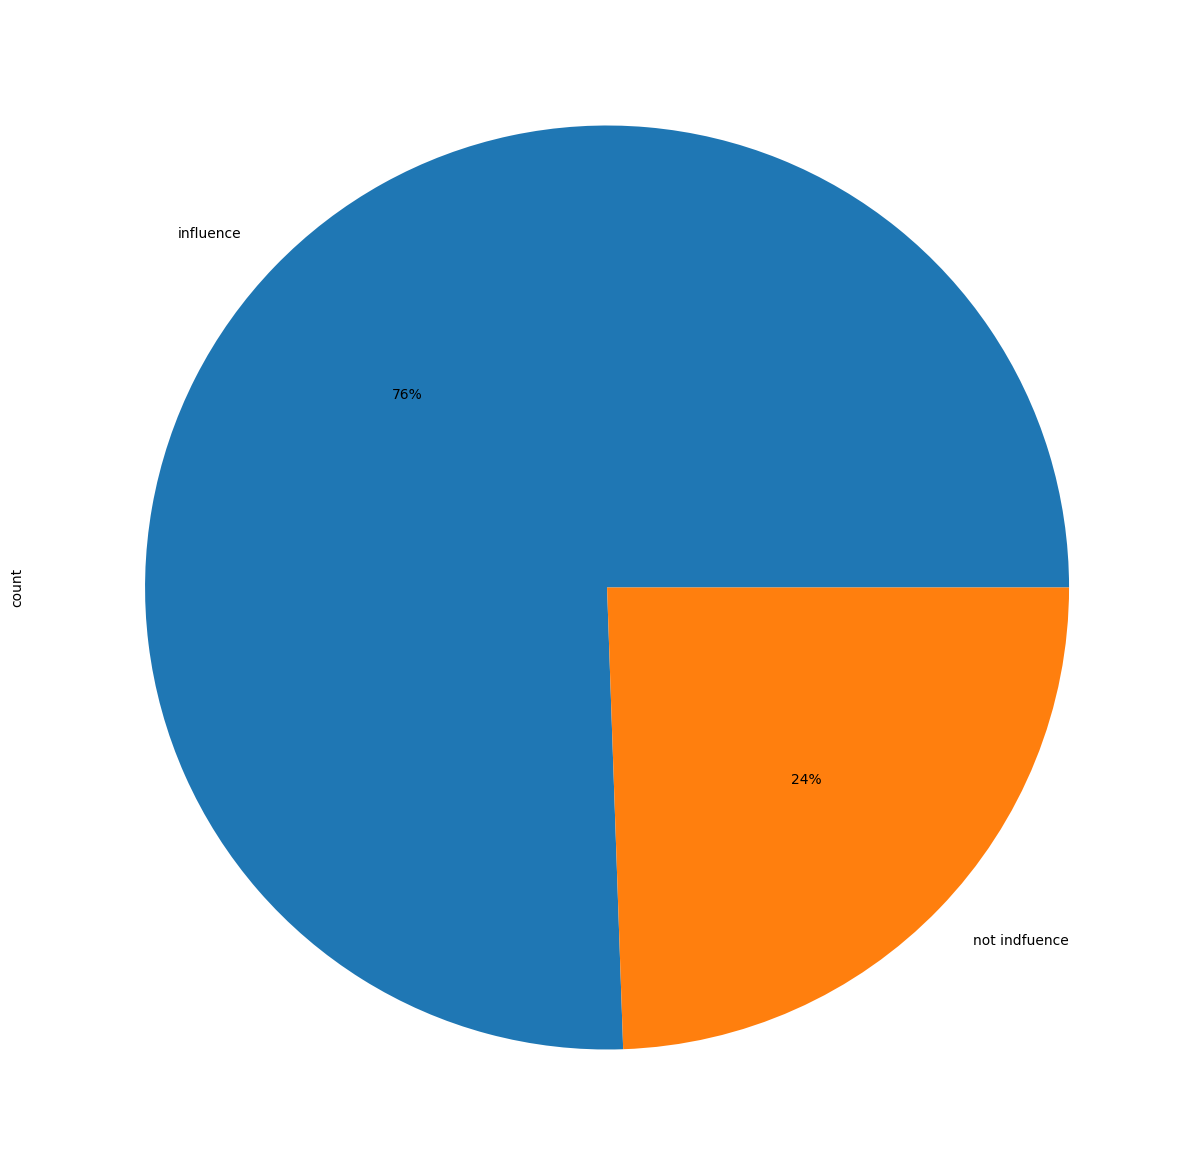

In [31]:
plt.figure(figsize=[15,15])
df_lipinski.lipinski.value_counts().plot(kind='pie',autopct='%.0f%%')
plt.savefig('persentage_of_drg_base_on_lipinski_rule.pdf')

In [32]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2025-03-01 06:59:08--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2025-03-01 06:59:08--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2025-03-01 06:59:09 (204 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2025-03-01 06:59:09--  https://github

In [37]:

! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [33]:
selection = ['canonical_smiles','molecule_chembl_id']
df_clean_smiles_selection = df_clean_smiles[selection]
df_clean_smiles_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [34]:

! cat molecule.smi | head -9

Cc1ccc2[nH]c(-n3[nH]c(C)c(Cc4ccccc4)c3=O)nc2c1C	CHEMBL3145420
Cc1[nH]n(-c2nc3ccccc3[nH]2)c(=O)c1Cc1ccc(Cl)cc1Cl	CHEMBL3145438
Cc1[nH]n(-c2nc3ccccc3[nH]2)c(=O)c1Cc1ccc(Cl)cc1	CHEMBL3145437
Cc1[nH]n(-c2nc3ccccc3[nH]2)c(=O)c1Cc1ccccc1Cl	CHEMBL3145418
O=c1c(Cc2ccccc2)c(-c2ccccc2)[nH]n1-c1nc2ccccc2[nH]1	CHEMBL3145434
Cc1c(-c2ccccc2)[nH]n(-c2nc3ccccc3[nH]2)c1=O	CHEMBL3145433
Cc1[nH]n(-c2nc3c(C)cccc3[nH]2)c(=O)c1C	CHEMBL3145428
Cc1[nH]n(-c2ccccn2)c(=O)c1C	CHEMBL3145426
Cc1[nH]n(-c2ncccn2)c(=O)c1C	CHEMBL3145425


In [35]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [38]:
! bash padel.sh

Processing CHEMBL3145420 in molecule.smi (1/90). 
Processing CHEMBL3145438 in molecule.smi (2/90). 
Processing CHEMBL3145437 in molecule.smi (3/90). Average speed: 2.45 s/mol.
Processing CHEMBL3145418 in molecule.smi (4/90). Average speed: 1.25 s/mol.
Processing CHEMBL3145434 in molecule.smi (5/90). Average speed: 1.20 s/mol.
Processing CHEMBL3145433 in molecule.smi (6/90). Average speed: 0.93 s/mol.
Processing CHEMBL3145428 in molecule.smi (7/90). Average speed: 1.26 s/mol.
Processing CHEMBL3145426 in molecule.smi (8/90). Average speed: 1.13 s/mol.
Processing CHEMBL3145425 in molecule.smi (9/90). Average speed: 0.82 s/mol.
Processing CHEMBL3145424 in molecule.smi (10/90). Average speed: 0.73 s/mol.
Processing CHEMBL3145423 in molecule.smi (11/90). Average speed: 0.66 s/mol.
Processing CHEMBL3145422 in molecule.smi (12/90). Average speed: 0.61 s/mol.
Processing CHEMBL3145432 in molecule.smi (14/90). Average speed: 0.57 s/mol.
Processing CHEMBL3145416 in molecule.smi (13/90). Average sp

In [39]:
df_total=pd.read_csv('/content/descriptors_output.csv')
df_total

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL3145420,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL3145438,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL3145418,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL3145437,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL3145433,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,CHEMBL5285500,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86,CHEMBL5276266,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87,CHEMBL5283651,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88,CHEMBL5288308,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df_total

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL3145420,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL3145438,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL3145418,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL3145437,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL3145433,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,CHEMBL5285500,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86,CHEMBL5276266,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87,CHEMBL5283651,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88,CHEMBL5288308,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
